# Add Co-occurence Network

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
import unicodedata
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Download dataset

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,acts,prompt,response,Word count,Grammar,Fluency,Clarity,Engagement,Overall Score,AI Similarity,Sources Found,Overall Plagiarism Score
0,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install and open the a...",575,82.0,61.0,72.0,72.0,72.0,48%,2.0,5%
1,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",448,81.0,53.0,69.0,73.0,68.0,48%,0.0,0%
2,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",426,83.0,40.0,71.0,72.0,65.0,86%,0.0,0%
3,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",505,82.0,48.0,70.0,73.0,67.0,30%,0.0,0%
4,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",561,82.0,47.0,69.0,73.0,67.0,30%,0.0,0%


### Check dataframe information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acts                      250 non-null    object 
 1   prompt                    250 non-null    object 
 2   response                  250 non-null    object 
 3   Word count                250 non-null    int64  
 4   Grammar                   248 non-null    float64
 5   Fluency                   248 non-null    float64
 6   Clarity                   248 non-null    float64
 7   Engagement                248 non-null    float64
 8   Overall Score             248 non-null    float64
 9   AI Similarity             247 non-null    object 
 10  Sources Found             248 non-null    float64
 11  Overall Plagiarism Score  248 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 23.6+ KB


In [4]:
non_stopword_df = df.copy()

non_stopword_df.head()

,acts,prompt,response,Word count,Grammar,Fluency,Clarity,Engagement,Overall Score,AI Similarity,Sources Found,Overall Plagiarism Score
0,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install and open the a...",575,82.0,61.0,72.0,72.0,72.0,48%,2.0,5%
1,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",448,81.0,53.0,69.0,73.0,68.0,48%,0.0,0%
2,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",426,83.0,40.0,71.0,72.0,65.0,86%,0.0,0%
3,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",505,82.0,48.0,70.0,73.0,67.0,30%,0.0,0%
4,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",561,82.0,47.0,69.0,73.0,67.0,30%,0.0,0%


### Data Cleaning

In [ ]:
def clean_text(text):
    # Convert to lowercase
    if isinstance(text, str):
        text = text.lower()
        return text
    return text

def clean_punctuation(text):
    # Remove punctuation characters
    if isinstance(text, str):
        text = re.sub(r'’', '', text)
        text = re.sub(r'[^\s\w]', ' ', text)
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^\D]', ' ', text)
        text = re.sub(r'_+', '', text)
        text = re.sub(r'\b[a-zA-Z]\b', '', text)
        return text
    return text

def normalize_characters(text):
    if isinstance(text, str):
        normalized_text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
        return normalized_text
    return text

def remove_stopword(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stopwords]
    return ' '.join(filtered_words)

In [6]:
df['response'] = df['response'].apply(clean_text).apply(clean_punctuation).apply(normalize_characters)

non_stopword_df['response'] = non_stopword_df['response'].apply(clean_text).apply(clean_punctuation).apply(normalize_characters).apply(remove_stopword)

In [7]:
df['response'].head()

0    quick guide   download  install and open the a...
1    quick guide   download  install  and open the ...
2    how to download  install  and open the app    ...
3    quick guide   download  install  and open the ...
4    how to download  install  and open the app    ...
Name: response, dtype: object

In [8]:
non_stopword_df['response'].head()

0    quick guide download install open app cross pl...
1    quick guide download install open app cross pl...
2    download install open app quick cross platform...
3    quick guide download install open app cross pl...
4    download install open app clean cross platform...
Name: response, dtype: object

### Data Preprocessing

In [9]:
df['response'] = df['response'].apply(word_tokenize)

In [10]:
non_stopword_df['response'] = non_stopword_df['response'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else x
)

### Word Frequencies

#### With stopwords

In [11]:
freq_df = df[['acts', 'response']]
topics = freq_df['acts'].unique()

for topic in topics:
    all_words = []
    responses = freq_df[freq_df['acts'] == topic]['response']
    for tokens in responses:
        all_words.extend(tokens)

    word_counts = {}
    for word in all_words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
    print(f"\n================================= Topic: {topic} =================================")
    for word in sorted(word_counts, key=word_counts.get, reverse=True):
        if word_counts[word] >= 5:
            print(f"{word}: {word_counts[word]}")
        else:
            continue
    if word_counts:
        avg_repetition = sum(word_counts.values()) / len(word_counts)
        print(f"\nAverage of duplicated words (≥5 reps): {avg_repetition:.2f}")
    else:
        print("\nNo words repeated ≥ 5 times.")


================================= Topic: Tech Writer =================================
the: 142
or: 86
app: 74
download: 58
screenshot: 57
and: 55
install: 49
run: 45
if: 44
to: 43
click: 39
linux: 38
open: 35
windows: 34
installer: 34
page: 30
for: 29
appimage: 28
macos: 27
store: 25
mobile: 25
on: 24
use: 23
double: 22
platform: 20
first: 19
from: 18
icon: 18
official: 17
rpm: 16
sudo: 16
verify: 15
checksum: 15
deb: 15
file: 15
package: 14
only: 14
dmg: 14
follow: 14
chmod: 14
tap: 14
you: 13
os: 13
drag: 13
quick: 12
provided: 12
applications: 12
check: 12
settings: 12
remove: 12
signature: 11
msi: 11
bit: 11
security: 11
in: 11
your: 11
choose: 10
exe: 10
pkg: 10
flatpak: 10
snap: 10
gatekeeper: 10
source: 10
desktop: 10
after: 10
right: 10
get: 9
correct: 9
then: 9
mac: 9
button: 9
downloaded: 9
finish: 9
allow: 9
executable: 9
permissions: 9
logs: 9
uninstall: 9
link: 9
step: 9
name: 9
guide: 8
screenshots: 8
before: 8
when: 8
apt: 8
dnf: 8
grant: 8
apps: 8
steps: 7
site: 7
as:

#### Without stopword

In [55]:
non_stopword_freq_df = non_stopword_df[['acts', 'response']]
topics = non_stopword_freq_df['acts'].unique()

for topic in topics:
    all_words = []
    responses = non_stopword_freq_df[non_stopword_freq_df['acts'] == topic]['response']
    for tokens in responses:
        all_words.extend(tokens)

    word_counts = {}
    for word in all_words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
    print(f"\n================================= Topic: {topic} =================================")
    for word in sorted(word_counts, key=word_counts.get, reverse=True):
        if word_counts[word] >= 5:
            print(f"{word}: {word_counts[word]}")
        else:
            continue
    if word_counts:
        avg_repetition = sum(word_counts.values()) / len(word_counts)
        print(f"\nAverage of duplicated words (≥5 reps): {avg_repetition:.2f}")
    else:
        print("\nNo words repeated ≥ 5 times.")


================================= Topic: Tech Writer =================================
app: 74
download: 58
screenshot: 57
install: 49
run: 45
click: 39
linux: 38
open: 35
windows: 34
installer: 34
page: 30
appimage: 28
macos: 27
store: 25
mobile: 25
use: 23
double: 22
platform: 20
first: 19
icon: 18
official: 17
rpm: 16
sudo: 16
verify: 15
checksum: 15
deb: 15
file: 15
package: 14
dmg: 14
follow: 14
chmod: 14
tap: 14
os: 13
drag: 13
quick: 12
provided: 12
applications: 12
check: 12
settings: 12
remove: 12
signature: 11
msi: 11
bit: 11
security: 11
choose: 10
exe: 10
pkg: 10
flatpak: 10
snap: 10
gatekeeper: 10
source: 10
desktop: 10
right: 10
get: 9
correct: 9
mac: 9
button: 9
downloaded: 9
finish: 9
allow: 9
executable: 9
permissions: 9
logs: 9
uninstall: 9
link: 9
step: 9
name: 9
guide: 8
screenshots: 8
apt: 8
dnf: 8
grant: 8
apps: 8
steps: 7
site: 7
available: 7
avoid: 7
wizard: 7
prompts: 7
complete: 7
required: 7
folder: 7
checklist: 7
needed: 7
ensure: 7
update: 7
add: 6
android

In [56]:
corpus_counts = Counter(all_words)
corpus_counts

Counter({'fuel': 47,
         'starter': 43,
         'battery': 40,
         'ignition': 33,
         'engine': 31,
         'pump': 24,
         'action': 24,
         'cause': 19,
         'switch': 19,
         'replace': 18,
         'system': 17,
         'oil': 17,
         'alternator': 16,
         'test': 15,
         'fob': 15,
         'filter': 14,
         'issue': 13,
         'key': 13,
         'sound': 13,
         'charging': 13,
         'underlying': 13,
         'check': 12,
         'observation': 12,
         'replacement': 11,
         'diagnostic': 11,
         'car': 10,
         'delivery': 10,
         'motor': 10,
         'solenoid': 10,
         'mechanical': 10,
         'terminals': 10,
         'record': 10,
         'codes': 10,
         'dashboard': 9,
         'necessary': 9,
         'electrical': 9,
         'power': 9,
         'crank': 9,
         'voltage': 9,
         'start': 8,
         'components': 8,
         'fails': 8,
         'troubl

### Co-occurrence Network

#### With stopwords

Nodes: 10005 Edges: 1458748


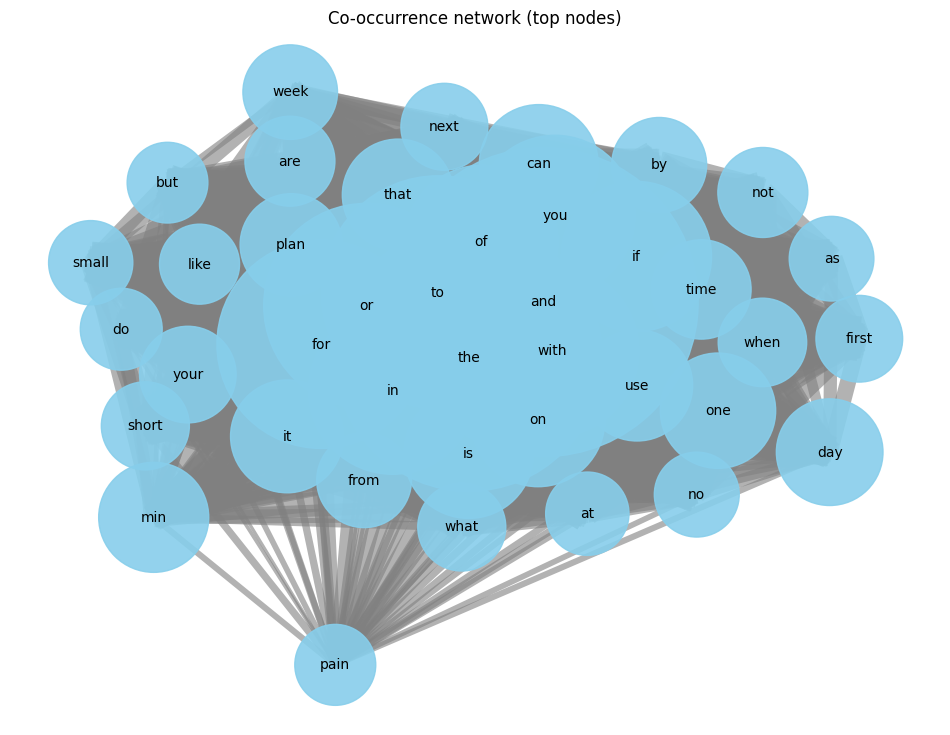

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

def build_cooccurrence(responses, min_edge_count=2, window=None):
    """
    responses: iterable ของ token-lists (แต่ละ response เป็น list ของ tokens)
    min_edge_count: ขอบที่นับถ้าความถี่ >= ค่านี้
    window: ถ้าเป็น None ให้ใช้ co-presence ใน response เดียวกัน,
            ถ้าเป็น int ให้ใช้ sliding window ขนาดนั้น (ยังไม่ใช้ในตัวอย่าง)
    """
    pair_counts = Counter()
    node_counts = Counter()

    for tokens in responses:
        if not isinstance(tokens, list):
            continue
        # นับความถี่คำ (รวม duplicates ใน response)
        node_counts.update(tokens)
        # ใช้ unique set เพื่อไม่ให้ pair จากคำซ้ำใน response เดิมถูกนับซ้ำมากเกินไป
        uniq = set(tokens)
        for a, b in combinations(sorted(uniq), 2):
            pair_counts[(a, b)] += 1

    # สร้าง graph
    G = nx.Graph()
    # เพิ่มโหนดพร้อมน้ำหนักความถี่
    for word, freq in node_counts.items():
        G.add_node(word, freq=freq)
    # เพิ่มขอบที่มีความถี่ >= min_edge_count
    for (a, b), w in pair_counts.items():
        if w >= min_edge_count:
            G.add_edge(a, b, weight=w)

    return G, node_counts, pair_counts

def draw_cooccurrence(G, node_counts, top_n_nodes=50, figsize=(12, 9)):
    # จำกัดจำนวนโหนดที่จะแสดง (เลือก top โดยความถี่)
    top_nodes = {n for n, _ in node_counts.most_common(top_n_nodes)}
    H = G.subgraph(top_nodes).copy()

    plt.figure(figsize=figsize)
    pos = nx.spring_layout(H, seed=42, k=0.5)
    freqs = [H.nodes[n]['freq'] for n in H.nodes()]
    sizes = [300 + 20 * f for f in freqs]
    weights = [H[u][v]['weight'] for u, v in H.edges()]
    widths = [0.5 + 0.3 * w for w in weights]

    nx.draw_networkx_nodes(H, pos, node_size=sizes, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_edges(H, pos, width=widths, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(H, pos, font_size=10)
    plt.axis('off')
    plt.title('Co-occurrence network (top nodes)')
    plt.show()

# ตัวอย่างเรียกใช้ ต่อ topic เดียวหรือทั้ง corpus
# ใช้ non_stopword_df['response'] หรือ df['response'] ตามต้องการ
responses = df['response']  # หรือ non_stopword_df['response']
G, node_counts, pair_counts = build_cooccurrence(responses, min_edge_count=2)
print("Nodes:", len(G.nodes()), "Edges:", len(G.edges()))
draw_cooccurrence(G, node_counts, top_n_nodes=40)

#### Without Stopwords

Nodes: 9885 Edges: 1193000


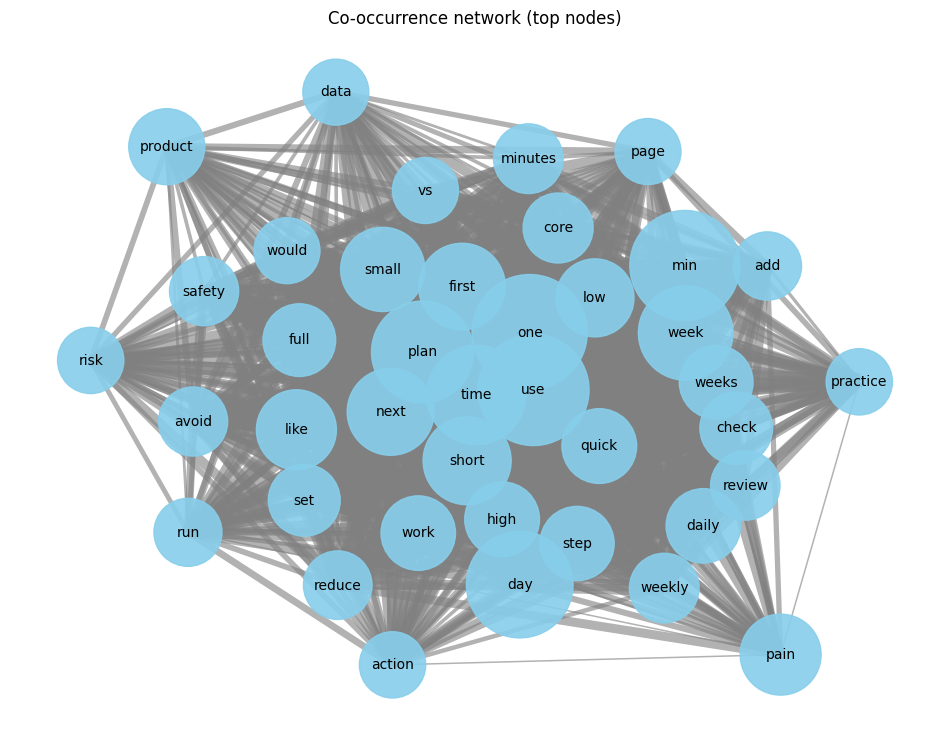

In [58]:
responses_non_stopword = non_stopword_df['response']
G, node_counts, pair_counts = build_cooccurrence(responses_non_stopword, min_edge_count=2)
print("Nodes:", len(G.nodes()), "Edges:", len(G.edges()))
draw_cooccurrence(G, node_counts, top_n_nodes=40)